In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# Load the dataset
file_path = 'emails.csv'
emails_df = pd.read_csv(file_path)

# Dropping the 'Email No.' column as it is not a feature
emails_df = emails_df.drop(columns=['Email No.'])

# Splitting the dataset into features and target
X = emails_df.drop(columns=['Prediction'])
y = emails_df['Prediction']



In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [16]:
# Initializing classifiers
knn = KNeighborsClassifier()
svm = SVC(probability=True)  # Set probability=True for ROC curve

# Training and testing KNN
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

# Training and testing SVM
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)


In [17]:

# Evaluating performance of KNN
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_confusion = confusion_matrix(y_test, knn_pred)

# Evaluating performance of SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_confusion = confusion_matrix(y_test, svm_pred)



In [18]:
# Output results
print(f"KNN Accuracy: {knn_accuracy}\n")
print(f"KNN Classification Report:\n{knn_report}\n")
print(f"KNN Confusion Matrix:\n{knn_confusion}\n")

print(f"SVM Accuracy: {svm_accuracy}\n")
print(f"SVM Classification Report:\n{svm_report}\n")
print(f"SVM Confusion Matrix:\n{svm_confusion}\n")



KNN Accuracy: 0.8338164251207729

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       735
           1       0.64      0.96      0.77       300

    accuracy                           0.83      1035
   macro avg       0.81      0.87      0.82      1035
weighted avg       0.88      0.83      0.84      1035


KNN Confusion Matrix:
[[576 159]
 [ 13 287]]

SVM Accuracy: 0.9304347826086956

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       735
           1       0.98      0.77      0.87       300

    accuracy                           0.93      1035
   macro avg       0.95      0.88      0.91      1035
weighted avg       0.93      0.93      0.93      1035


SVM Confusion Matrix:
[[731   4]
 [ 68 232]]



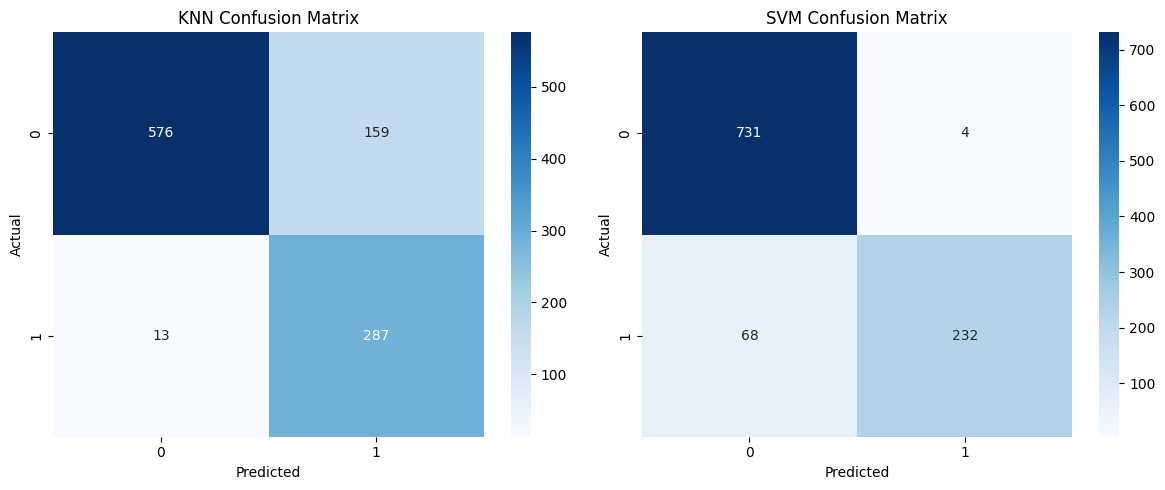

In [19]:
# Plotting the confusion matrix for KNN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(knn_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotting the confusion matrix for SVM
plt.subplot(1, 2, 2)
sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()



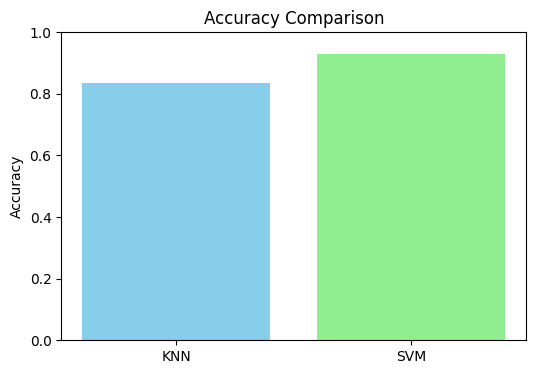

In [20]:
# Accuracy Comparison Bar Chart
plt.figure(figsize=(6, 4))
accuracy_scores = [knn_accuracy, svm_accuracy]
classifiers = ['KNN', 'SVM']

plt.bar(classifiers, accuracy_scores, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()



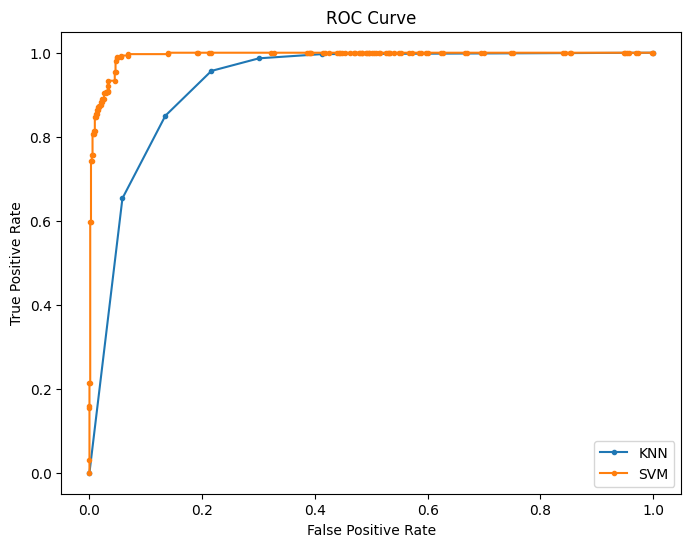

In [21]:
# ROC Curve for both classifiers
knn_probs = knn.predict_proba(X_test_scaled)[:, 1]
svm_probs = svm.predict_proba(X_test_scaled)[:, 1]

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()